In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

In [66]:
data = {'Wavelength': [405, 465, 528, 591, 780],
        'Specific Rotation': [15, 12.5, 7.5, 5.8335, 1.6665]}

df = pd.DataFrame(data)


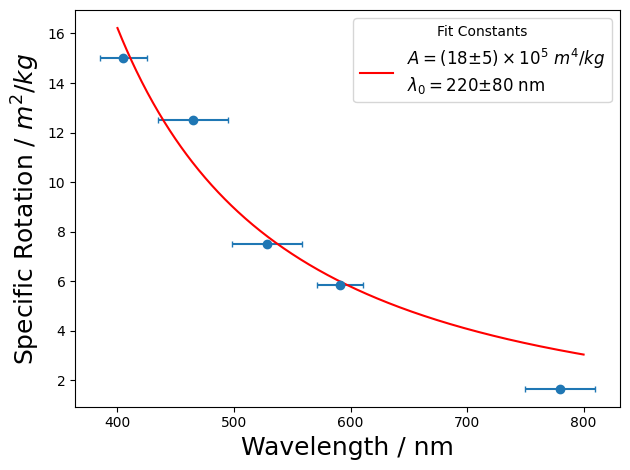

Optimized Parameters: param1 = 1.8e+06 ± 4.1e+05
Optimized Parameters: param2 = 2.2e+02 ± 7.1e+01


In [67]:
# Define the equation to fit
def custom_equation(lam, A, lam0):
    # Replace this with your actual equation
    return A / (lam**2 - lam0**2)

errors = [20, 30, 30, 20, 30]

# Plot the DataFrame
plt.errorbar(df['Wavelength'], df['Specific Rotation'], xerr=errors, fmt='o', capsize=2.5)
plt.xlabel('Wavelength / nm', fontsize=18)
plt.ylabel('Specific Rotation / $m^2/kg$', fontsize=18)

# Use curve_fit to find optimal parameters and covariance matrix
popt, pcov = curve_fit(custom_equation, df['Wavelength'], df['Specific Rotation'])

# Extract the optimized parameters
param1_opt, param2_opt = popt

# Extract the diagonal elements of the covariance matrix as variances
param1_var, param2_var = pcov.diagonal()

# Standard deviations are the square root of variances
param1_std = param1_var ** 0.5
param2_std = param2_var ** 0.5

# Format optimized parameters and uncertainties in scientific notation
param1_format = "{:.1e}".format(param1_opt)
param2_format = "{:.1e}".format(param2_opt)
param1_std_format = "{:.1e}".format(param1_std)
param2_std_format = "{:.1e}".format(param2_std)

# Plot the fitted curve
x_values = np.linspace(400, 800, 500)
fitted_curve = custom_equation(x_values, param1_opt, param2_opt)
plt.plot(x_values, fitted_curve, label='$A = (18 ± 5) \\times 10^5~m^4/kg$\n$\lambda_0=220 ± 80$ nm', color='red')

# Display the legend
plt.legend(title='Fit Constants', fontsize=12)

plt.tight_layout()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Sugar polarization /Data_Processing/Drude.png', dpi=300)

# Show the plot
plt.show()

# Display the optimized parameters and their uncertainties in scientific notation
print(f'Optimized Parameters: param1 = {param1_format} ± {param1_std_format}')
print(f'Optimized Parameters: param2 = {param2_format} ± {param2_std_format}')
